<a href="https://colab.research.google.com/github/rishadb/sample_codes/blob/main/2NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CUSTOM TRANSFORMS AND CUSTOM DATASET

import torch, torchvision, math
from torch.utils.data import Dataset, DataLoader
import numpy as np

#pytorch TRANSFORMS: torchvision.transforms.transformMethode
"""
applied to images, tensor, ndarrays, or custom data
images: CenterCrop, GreyScale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Rescale
Tensors: LinearTransformation, Normalize, RandomErasing
converion: ToPILImages, ToTensor
Generic: Lambda, 
Custom: write custom classes
compose multiple transforms: transforms.Compose(Rescale(256), RandomCrop(224)...)
"""

#CUSTOM TRANSFORM CLASSES:

class ToTensor: #1 custom transform
  def __call__(self, sample): #when the instalce of a class is called
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform: #2 transform
  def __init__(self, factor):
    self.factor = factor
  def __call__(self, sample):
    inputs, targets = sample
    inputs *= self.factor 
    return inputs, targets

  #combine transform classes
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(3)])

#CUSTOM DATASET
class FromcsvDataset(Dataset): #custom dataset frm csv
  def __init__(self, dir, transform = None, delimiter =",", dtype = np.float32, skiprows =1): 
    self.transform = transform #transformation method as callable object
    xy = np.loadtxt(dir, delimiter = delimiter, dtype = dtype, skiprows = skiprows) #load data with np from csv
    #self.x = torch.from_numpy(xy[:, 1:]) 
    #self.y = torch.from_numpy(xy[:, [0]]) # putting as [0] makes y.shape to (m,1)
    self.x = xy[:, 1:]
    self.y = xy[:, [0]]
    self.n_samples = xy.shape[0] # to return on len

  def __getitem__(self, index): #redefine indexing as dataset has x's and y's
    
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample
  
  def __len__(self):  #redefine length to give total sample amount
    return self.n_samples 
dir = '/content/drive/MyDrive/DATA/wine.csv'
dataset = FromcsvDataset(dir, transform = composed)
features, labels = dataset[0] # the dataset is a list of set of features and labels only accessed by indexes
print(len(dataset))
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)
#print(dataloader[0]) - this gives error, dataloader is not subscriptable
for data, targ in dataloader: #dataloader only accessible by this extraction, gives batches of size 4 of data and target respectively
  print(data[3]) # last batch may not be exact batch_size, so index out error could occur
  print(targ[2])



In [ ]:
#SOFTMAX s(yi)= e^yi/epsilon(e^yj)
#cross-Entropy loss, D(y_cap, y) = -1/n(epsilon(yi.log(yi))), y should be oneHot, dont implement a softmax layer when CEloss is used as softmax already included in CEL
#Binary cross Entropy Loss(BCE) for binary(one 0 or 1 problem), use sigmoid at the last layer


In [ ]:
#activation: torch.nn.functional as f, f.actName
#step func, 
#sigmoid(1+(1/e^-x)), 
#tanh((2/(1+e^-2x))-1) - gives -1 to 1, ReLU(f(x)=max(0,x)), 
#Leaky ReLU -use if gradient vanishing problem encountered (f(x) = {x if x >=0, a.x if x<0}) - a is a very small number , 
#Softmax(convert inputs into vector of vals between 0 and 1, and all vals add up to 1) - use for multiclass classif problem

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

train_dataset: Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()
test_dataset: Dataset MNIST
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test
    StandardTransform
Transform: ToTensor()
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f4b77a8f450>
test_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f4b74033fd0>
samples.shape, labels.shape: (torch.Size([64, 1, 28, 28]), torch.Size([64]))
epoch 1 / 3, steps 100 / 938, loss = 0.4879
trainloader.data, targets (torch.Size([64, 784]), torch.Size([64]))
epoch 1 / 3, steps 200 / 938, loss = 0.4192
trainloader.data, targets (torch.Size([64, 784]), torch.Size([64]))
epoch 1 / 3, steps 300 / 938, loss = 0.3937
trainloader.data, targets (torch.Size([64, 784]), torch.Size([64]))
epoch 1 / 3, steps 400 / 938, loss = 0.3118
trainload

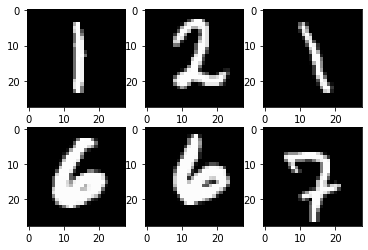

In [ ]:
#FCN

# 1)import modules, set device 2)set HP 3)load data 4)create FCN, Initialize model 5)Define Loss and optimizer 6)Train network 7)check accuracy of train and test set
# train: for loop-epoch-batching: data to cuda, data shaping, forward(train, loss), backward(old grads to zero, calcgradient), grad descent(step)

#1) 6 * Imports: torch: nn, optim, .nn.functional(loss),utils.data.Dataloader torchvision: datasets, transforms
import torch
import torch.nn as nn #all the nn arch modules, loss functions, activation funcs
import torch.optim as optim # optimization algos: SGD, Adam,..
import torch.nn.functional as F #all func that dont have any params like activation funcs: relu, tanh,..
from torch.utils.data import DataLoader # dataset mgmt, minibatches
import torchvision.datasets as datasets # std datasets like mnist,..
import torchvision.transforms as transforms #to transform datasets
import matplotlib.pyplot as plt
  #set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#2)HP
input_size = 784 
num_classes = 10 # output size
learning_rate = 0.001
batch_size = 64
hidden_size = 100
num_epochs = 3
#transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5,.5,.5),(.5,.5,.5  ))])
transforms = transforms.ToTensor()
#3)Load Data
train_dataset = datasets.MNIST(root = "dataset/", train = True, transform = transforms, download = True) #select, download&save and transformtoTensor data
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True, num_workers = 2) # batching and shuffle dataset
test_dataset = datasets.MNIST(root = "dataset/", train = False, transform = transforms, download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False, num_workers = 2)
print(f"train_dataset: {train_dataset}")
print(f"test_dataset: {test_dataset}")
print(f"train_loader: {train_loader}")
print(f"test_loader: {test_loader}")

  #verify data
example = iter(train_loader) # use iter istead of for loop to go through list so everything wont come at a time, access each element with next()
samples, labels = example.next()
print(f'samples.shape, labels.shape: {samples.shape, labels.shape}')

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap = 'gray')

#4) Initialize network
    
    #create FCN
class NN(nn.Module): 
  
  def __init__(self, input_size,hidden_size, num_classes):
    super(NN, self).__init__()
    #super.__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) #defining a layer
    self.fc2 = nn.Linear(hidden_size, num_classes) #defining output layer
  
  def forward(self, x):
    x = F.relu(self.fc1(x)) # first layer ops
    x = self.fc2(x) # last layer ops, x becomes output, softmax applied by CrossEntrpyLoss use
    return x

    #initialize model 
model = NN(input_size = input_size, num_classes = num_classes, hidden_size = hidden_size).to(device)

#5)define Loss and optimizer
criterion = nn.CrossEntropyLoss() #select and set loss function from nn module
optimizer = optim.Adam(model.parameters(), lr = learning_rate) #select and set optimiser from nn module, pass in params to be optimsed, set learning rate

#6) Train Network
n_total_steps = len(train_loader)
for epoch in range(num_epochs): #epoch
  for i, (data, targets) in enumerate(train_loader): #batch-wise data loading
  
  #get datas to CUDA
    data = data.to(device)
    targets = targets.to(device)

  #Correct the data shape
    
    data = data.reshape(data.shape[0], -1) # make the data drom dataloader shape of 64, 1, 28, 28 into 64, 784
    

  #forward
    scores = model(data) # training data done here
    loss = criterion(scores, targets) #get loss from y and y_dash

  #backward
    optimizer.zero_grad() # clear old grads
    loss.backward() #find gradients

  #gradient decent
    optimizer.step() #adjust parameters wrt grads

  #just checking
    if (i+1)%100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, steps {i+1} / {n_total_steps}, loss = {loss.item():.4f}')
      print(f'trainloader.data, targets {data.shape, targets.shape}')

#7) check accuracy test
def check_accuracy(loader, model):
  
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():

    for x, y in loader:
      x = x.to(device = device)
      y = y.to(device = device)
      x = x.reshape(x.shape[0], -1) # OR x.reshape(-1, 28*28)

      scores = model(x)# score is (64, 10)
      
      _, predictions = scores.max(1) #preds is the tensor of batchsize = 64 with indexes of max values, _ is for max values which we dont need here
      num_correct +=(predictions == y).sum().item() # adds up all true values of bool tensor from comparison, y is also vector of indexes of 1 in oneHot
      num_samples += predictions.size(0) #tensor.size(axis) gives integer
  acc = num_correct/num_samples
  model.train()
  return acc


In [ ]:
train_accuracy = check_accuracy(train_loader, model)
test_accuracy = check_accuracy(test_loader, model)
print(f'train_accuracy, test_accuracy = {train_accuracy, test_accuracy}')

train_accuracy, test_accuracy = (0.9695666666666667, 0.9639)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


##HP
batch_size = 64
input_features = 1024
num_classes = 10
hidden_size_1 = 50
hidden_size_2 = 20
learning_rate = .001
num_epoch = 5

#DATA
train_dataset = datasets.MNIST(root = "datas/", transform=transforms, download=True)
test_dataset = datasets.MNIST(root = "datas/", train=False, transform=transforms,download = True )
train_dataloader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True, num_workers=2)
test_datalolader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

#Defines
class Cif(nn.Module):
  def __init__(self, batch_size, input_features, num_classes, hidden_size_1, hidden_size_2):
    super().__init__()
    self.fc1 = nn.Linear(in_features=input_features, out_features= hidden_size_1)
    self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
    self.fc3 = nn.Linear(hidden_size_2, num_classes)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

#initialize

model = Cif(batch_size, input_features, num_classes, hidden_size_1, hidden_size_2).to
criterion = nn.CrossEntropyLoss()
optim = optim.RMSprop(model.parameters(),lr = learning_rate)

#training
for epoch in range(num_epoch):
  for i, (data, label) in enumerate(train_dataloader):
    score = model(data)
    optim.zero_grad()
    loss = criterion(score, label)
    loss.backward()
    optim.step()



    




